In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [36]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [37]:
df['age'] = df['age'].fillna(np.mean(df['age']))
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [38]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

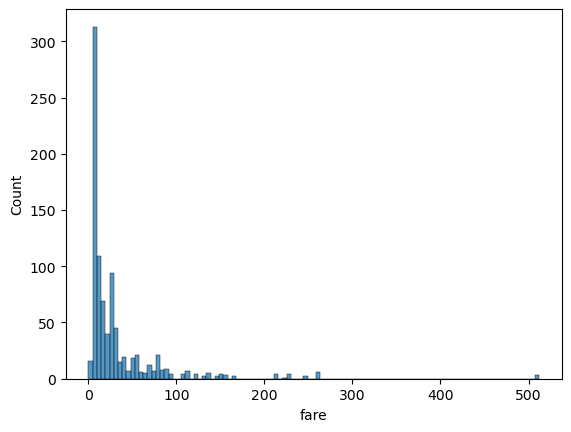

In [39]:
sns.histplot(x=df['fare'])
plt.show()

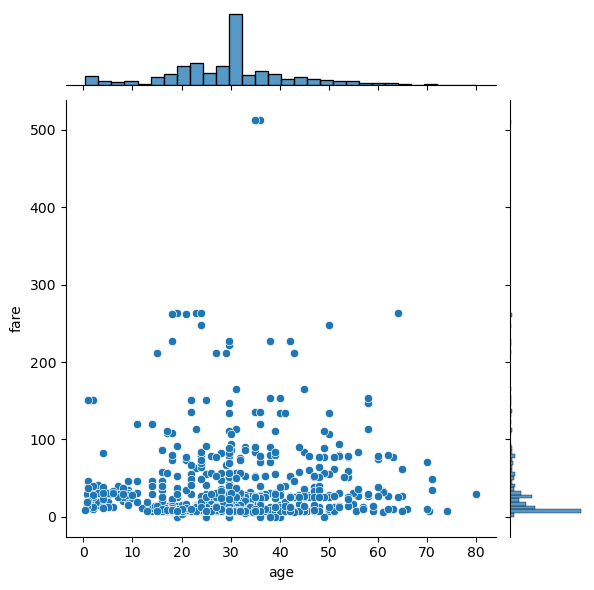

In [40]:
sns.jointplot(x=df['age'],y=df['fare'],kind='scatter')
plt.show()

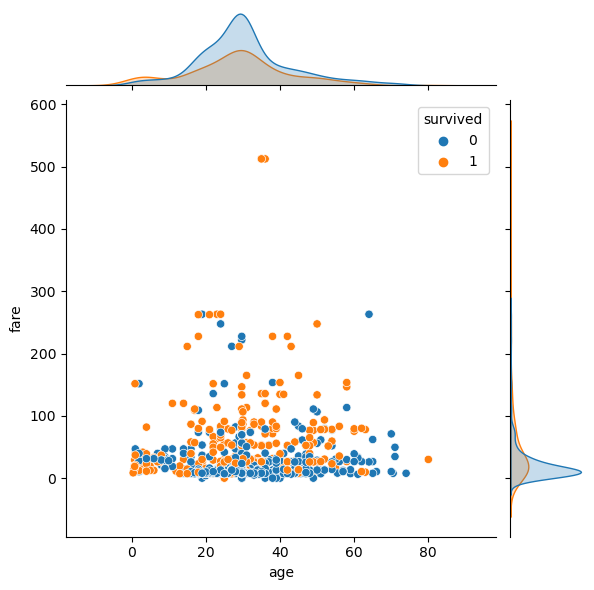

In [41]:
sns.jointplot(x=df['age'],y=df['fare'],kind='scatter',hue=df['survived'])
plt.show()

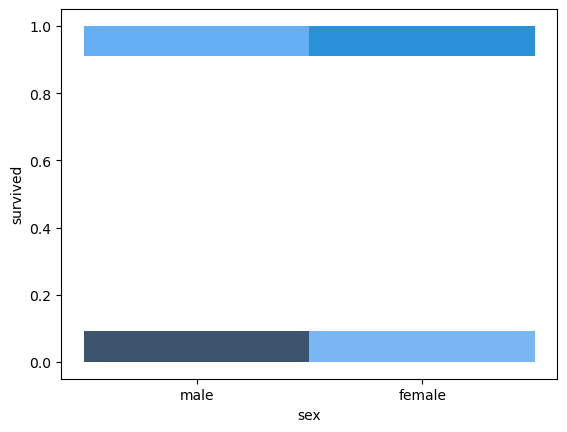

In [42]:
sns.histplot(x=df['sex'],y=df['survived'])
plt.show()

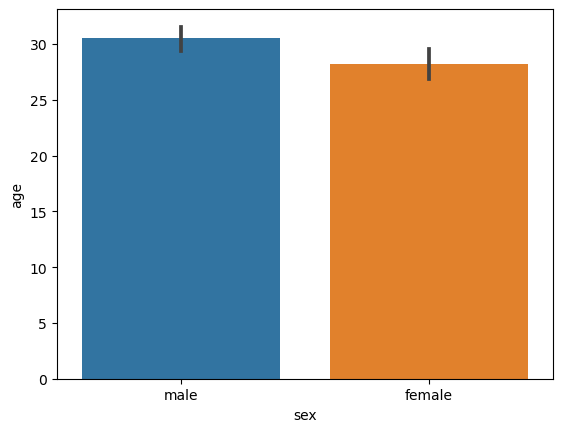

In [43]:
sns.barplot(x='sex',y='age',data=df)
plt.show()

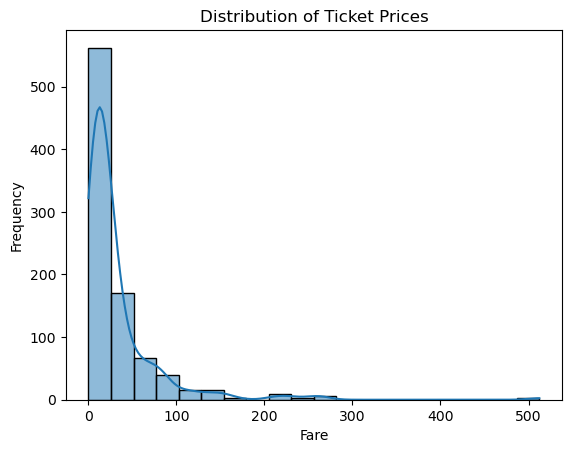

In [44]:
# Plot histogram of ticket prices
sns.histplot(df['fare'], bins=20, kde=True)
plt.title('Distribution of Ticket Prices')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


survived       int64
pclass         int64
age          float64
sibsp          int64
parch          int64
fare         float64
deck        category
dtype: object


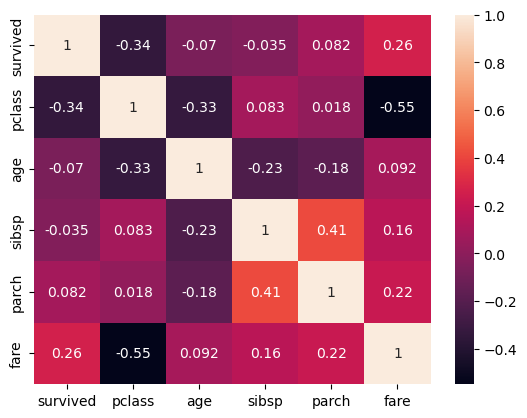

In [46]:
import pandas as pd

h1 =df.drop(columns=["sex","embarked","class","who","adult_male","embark_town","alive","alone"])
h1
# Check the data types of columns in the DataFrame
print(h1.dtypes)

# Drop non-numeric columns
h1_numeric = h1.select_dtypes(include=['number'])

# Calculate correlation matrix
corr = h1_numeric.corr()

# Plot heatmap
import seaborn as sns
sns.heatmap(corr, annot=True)
plt.show()
